Introductory EDA

In [2]:
import pandas as pd
df=pd.read_csv('normalized_text.csv')
df.rename(columns={'final_text': 'text'}, inplace=True)

df.head()

,category,text
0,business,quarterly profit u medium giant timewarner jum...
1,business,dollar hit highest level euro almost three mon...
2,business,owner embattle russian oil giant yukos ask buy...
3,business,british airway blame high fuel price drop prof...
4,business,share uk drink food firm ally domecq rise spec...


In [3]:
df.shape

(2225, 2)

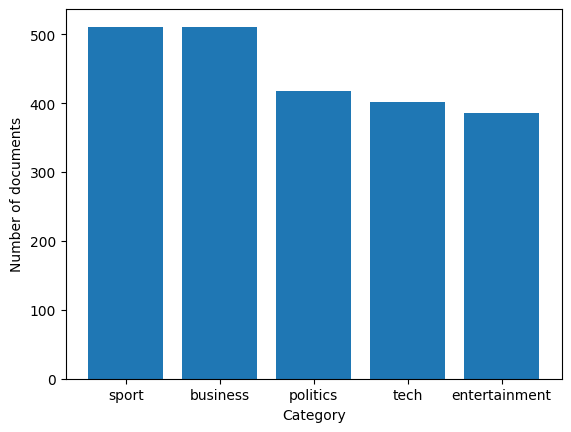

In [4]:
import matplotlib.pyplot as plt

category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)

plt.xlabel('Category')
plt.ylabel('Number of documents')

plt.show()


In [5]:
import numpy as np

# Calculate text length
df['text_length'] = df['text'].apply(len)

# Calculate statistics
avg_length = np.mean(df['text_length'])
std_length = np.std(df['text_length'])
min_length = np.min(df['text_length'])
max_length = np.max(df['text_length'])

print("Text Length Statistics:")
print("Average Length:", avg_length)
print("Standard Deviation:", std_length)
print("Minimum Length:", min_length)
print("Maximum Length:", max_length)


Text Length Statistics:
Average Length: 1432.0669662921348
Standard Deviation: 842.7704220483546
Minimum Length: 296
Maximum Length: 15305


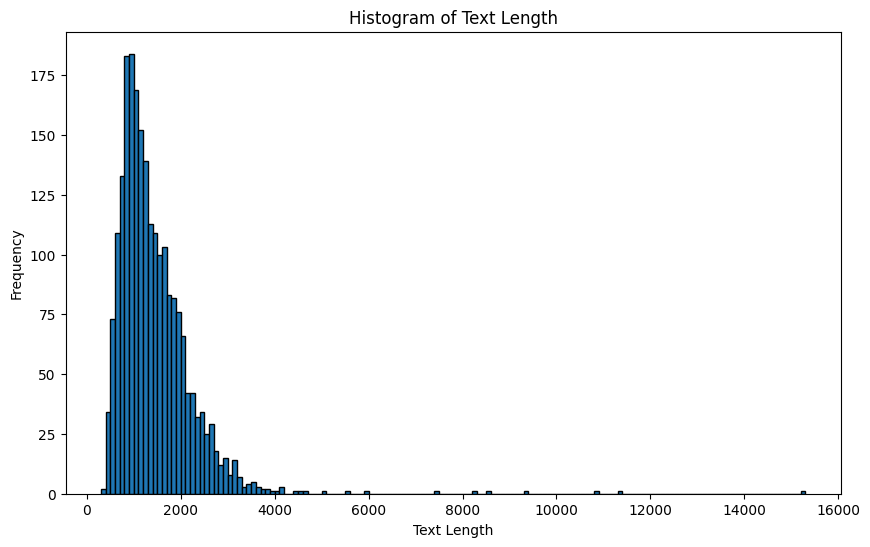

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=150, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()


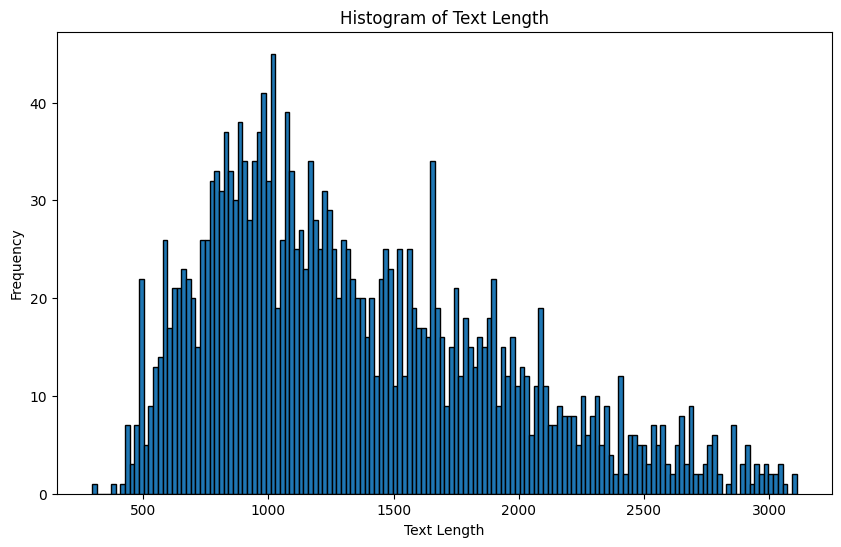

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mean_length = df['text_length'].mean()
std_deviation = df['text_length'].std()
upper_threshold = mean_length + 2 * std_deviation
df = df[df['text_length'] <= upper_threshold].copy()
df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=150, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2169 non-null   object
 1   text         2169 non-null   object
 2   text_length  2169 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 51.0+ KB


In [9]:
#save new data to the file
df[['category', 'text']].to_csv("normalized_text_without_outliers.csv", index=False)


In [10]:
df.head()


,category,text,text_length
0,business,quarterly profit u medium giant timewarner jum...,1631
1,business,dollar hit highest level euro almost three mon...,1465
2,business,owner embattle russian oil giant yukos ask buy...,1014
3,business,british airway blame high fuel price drop prof...,1582
4,business,share uk drink food firm ally domecq rise spec...,1021


In [11]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8)
X = vectorizer.fit_transform(df['text'])

Data on 2D plot (after reduction)

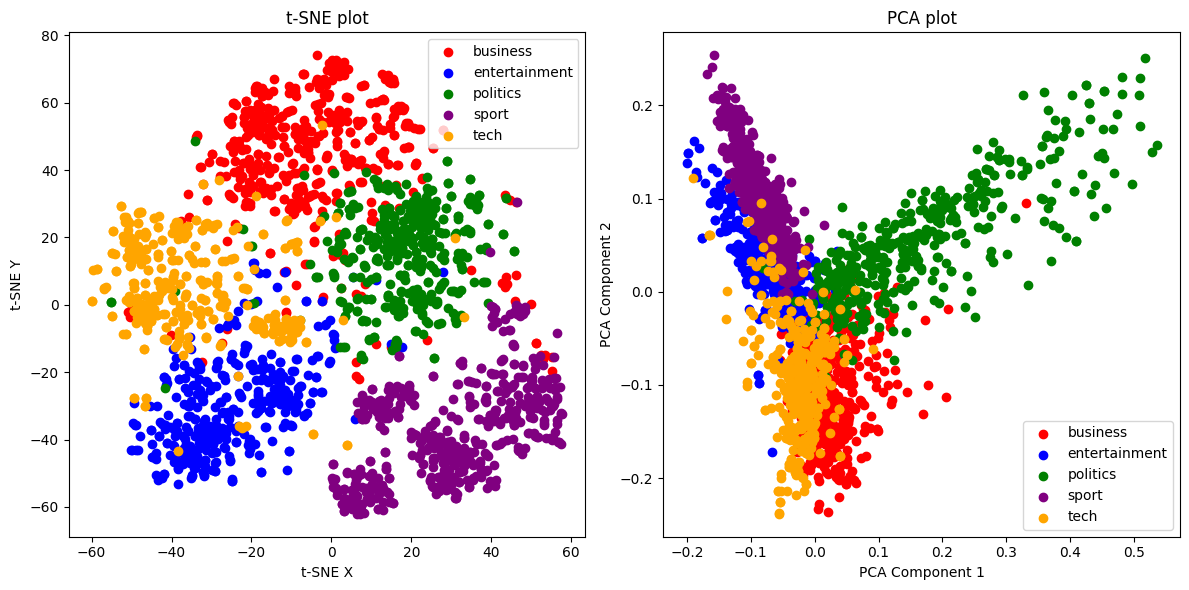

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


#----------T-SNE---------
tsne = TSNE(n_components=2, random_state=42, init='random')
X_tsne = tsne.fit_transform(X.toarray())

df['tsne_x'] = X_tsne[:, 0]
df['tsne_y'] = X_tsne[:, 1]


#----------PCA---------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]


#----------PLOTS---------
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
categories = df['category'].unique()

# Plot t-SNE
axs[0].set_title('t-SNE plot')
for category, color in zip(categories, colors):
    axs[0].scatter(df[df['category'] == category]['tsne_x'],
                   df[df['category'] == category]['tsne_y'],
                   color=color,
                   label=category)
axs[0].set_xlabel('t-SNE X')
axs[0].set_ylabel('t-SNE Y')
axs[0].legend()

# Plot PCA
axs[1].set_title('PCA plot')
for category, color in zip(categories, colors):
    axs[1].scatter(df[df['category'] == category]['pca_x'],
                   df[df['category'] == category]['pca_y'],
                   color=color,
                   label=category)
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 2')
axs[1].legend()

plt.tight_layout()
plt.show()


Silhouette Plot

C:\Users\julia\AppData\Local\Temp\ipykernel_7400\256810339.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab20').colors[i % 20]


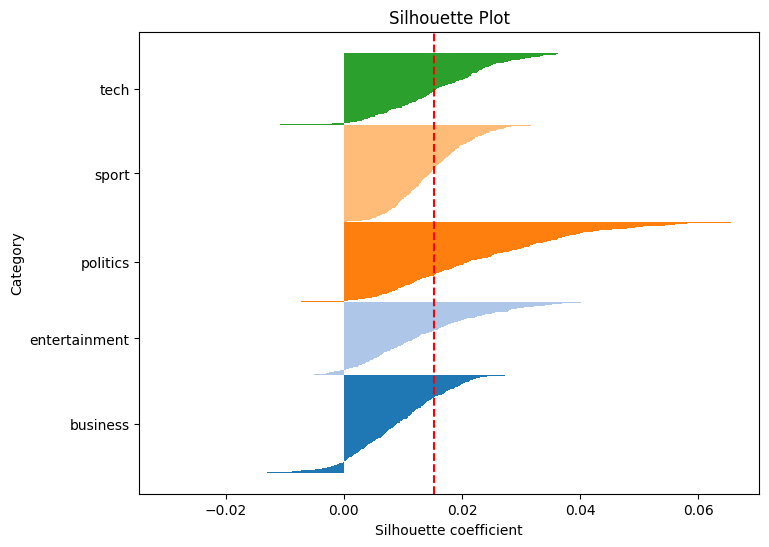

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

cluster_labels = df['category'].values

# Calculate the Silhouette scores
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_values = silhouette_samples(X, cluster_labels)

# Create a horizontal bar plot for Silhouette scores
fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower = y_upper = 0
for i, category in enumerate(df['category'].unique()):
    category_silhouette_values = silhouette_values[cluster_labels == category]
    category_silhouette_values.sort()
    y_upper += len(category_silhouette_values)
    color = plt.cm.get_cmap('tab20').colors[i % 20]
    ax.barh(range(y_lower, y_upper), category_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(category_silhouette_values)

ax.axvline(x=silhouette_avg, color='red', linestyle='--')
ax.set_yticks(y_ticks)
ax.set_yticklabels(df['category'].unique())
ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Category')
ax.set_title('Silhouette Plot')
plt.show()


tag cloud

c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


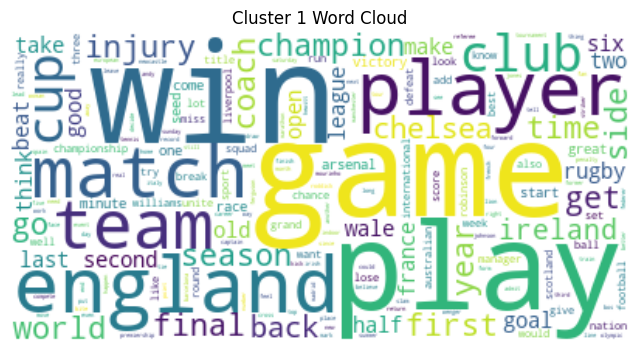

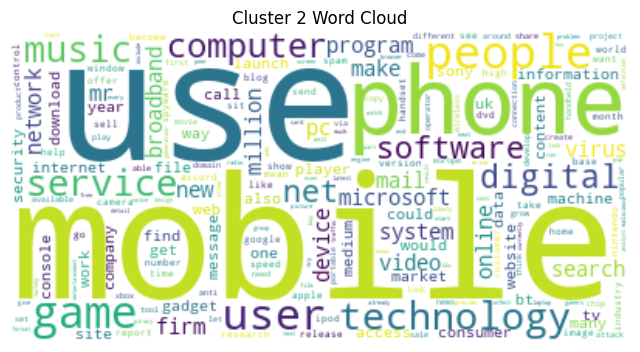

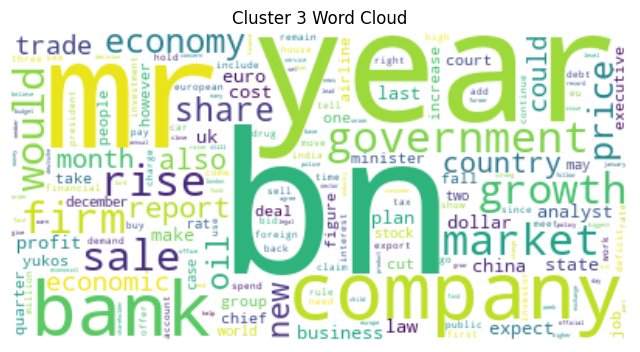

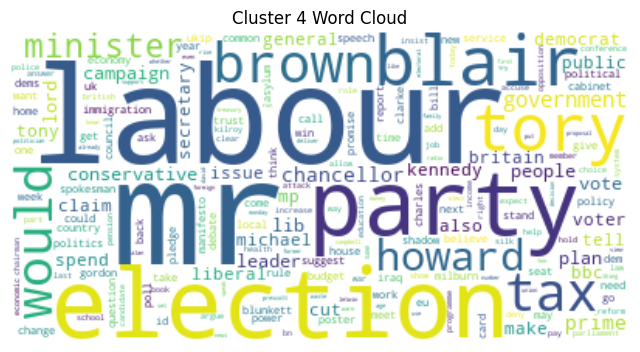

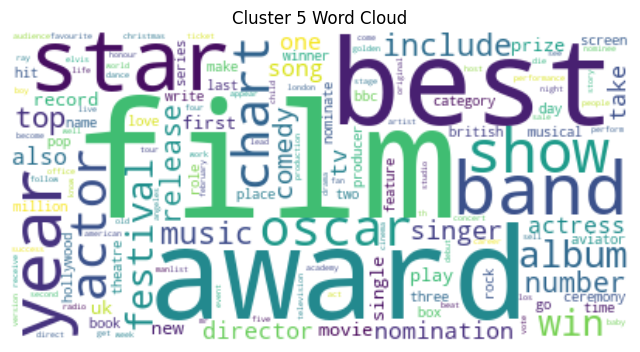

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df=pd.read_csv('normalized_text_without_outliers.csv')

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.8)
tfidf_matrix = vectorizer.fit_transform(df['text'])

# K-means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)
df['cluster'] = kmeans.labels_

feature_names = vectorizer.get_feature_names_out()

# Iterate over each cluster
for cluster_id in range(k):
    cluster_text = df[df['cluster'] == cluster_id]['text']
    cluster_tfidf = tfidf_matrix[df['cluster'] == cluster_id]
    
    average_tfidf = cluster_tfidf.mean(axis=0).tolist()[0]    
    words_scores = {word: score for word, score in zip(feature_names, average_tfidf)}    
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(words_scores)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_id + 1} Word Cloud')
    plt.show()
